In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

% matplotlib inline

In [7]:
INPUT_PATH = os.path.join('..', 'data')
TRAIN_ID_DF = pd.read_csv(os.path.join(INPUT_PATH, 'train_experiment_ids.tsv'), sep='\t')
TRAIN_LAB_DF = pd.read_csv(os.path.join(INPUT_PATH, 'train_observed_labels.tsv'), sep='\t')

In [8]:
print('unique trials:\t%d' % len(TRAIN_ID_DF['Experiment ID'].unique()))
print('unique cell types:\t%d' % len(TRAIN_LAB_DF['Cell Type'].unique()))

unique trials:	79
unique cell types:	46


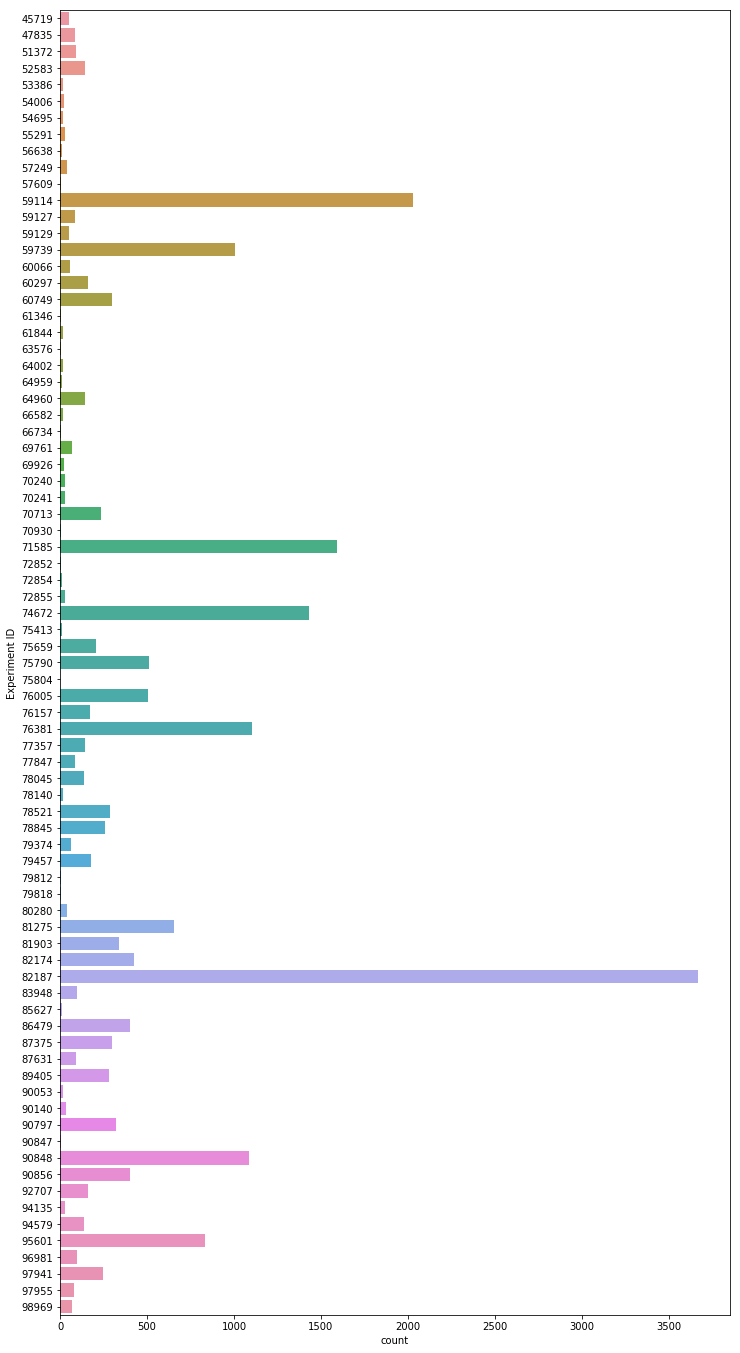

In [9]:
plt.figure(figsize=(12,24))
_ = sns.countplot(y=TRAIN_ID_DF['Experiment ID'])

In [10]:
TRAIN_LAB_DF[TRAIN_ID_DF['Experiment ID'] == 59114].groupby('Cell Type')['Cell Type'].count()

Cell Type
CL:0000037 hematopoietic stem cell               537
CL:0002033 short term hematopoietic stem cell    696
CL:0002034 long term hematopoietic stem cell     798
Name: Cell Type, dtype: int64

In [11]:
TRAIN_ID_DF[TRAIN_LAB_DF['Cell Type'] == 'CL:0000037 hematopoietic stem cell'].groupby('Experiment ID')['Experiment ID'].count()

Experiment ID
59114    537
64002     17
87631     91
Name: Experiment ID, dtype: int64

In [12]:
TRAIN_ID_DF.groupby('Experiment ID')['Experiment ID'].count()

Experiment ID
45719      53
47835      87
51372      93
52583     142
53386      14
54006      24
54695      16
55291      28
56638      12
57249      39
57609       3
59114    2031
59127      84
59129      49
59739    1006
60066      55
60297     160
60749     296
61346       4
61844      16
63576       5
64002      17
64959       9
64960     143
66582      19
66734       4
69761      66
69926      22
70240      27
70241      28
         ... 
78845     257
79374      65
79457     180
79812       4
79818       4
80280      40
81275     654
81903     340
82174     423
82187    3667
83948      98
85627       9
86479     401
87375     301
87631      91
89405     283
90053      16
90140      35
90797     319
90847       8
90848    1088
90856     400
92707     161
94135      29
94579     139
95601     836
96981      96
97941     244
97955      80
98969      69
Name: Experiment ID, Length: 79, dtype: int64

In [13]:
exp_counts = TRAIN_ID_DF.groupby('Experiment ID')['Experiment ID'].count()
print(exp_counts.describe())
print("The most frequent category: ", exp_counts.argmax())

count      79.000000
mean      270.746835
std       543.294543
min         2.000000
25%        17.500000
50%        84.000000
75%       270.000000
max      3667.000000
Name: Experiment ID, dtype: float64
('The most frequent category: ', 82187)


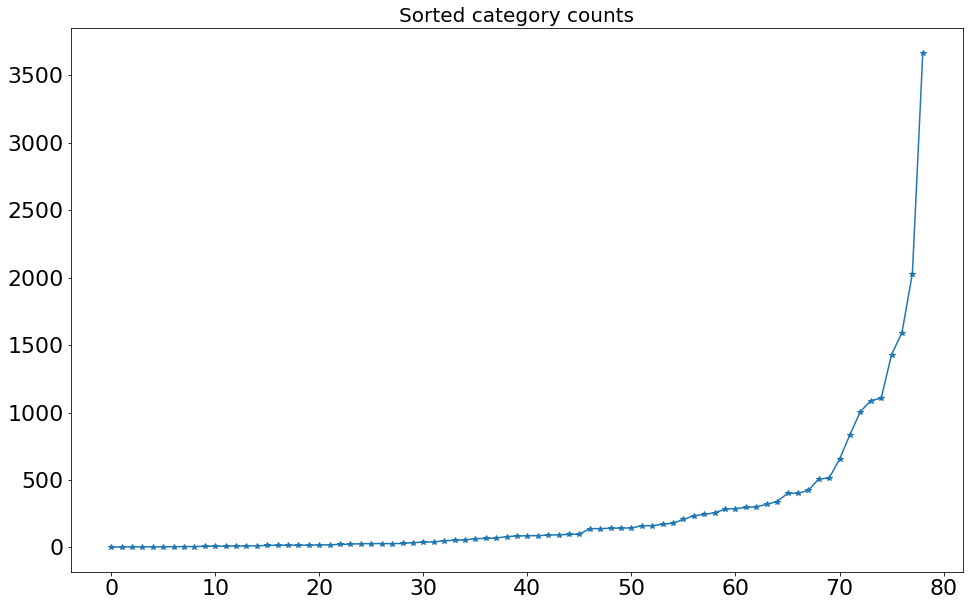

In [28]:
sorted_exp_counts = sorted(exp_counts.values)
index_100 = np.where(np.array(sorted_exp_counts) > 100)[0][0]

plt.figure(figsize=(16, 10))
plt.title("Sorted category counts",fontsize=20)
_ = plt.plot(sorted_exp_counts, '*-')

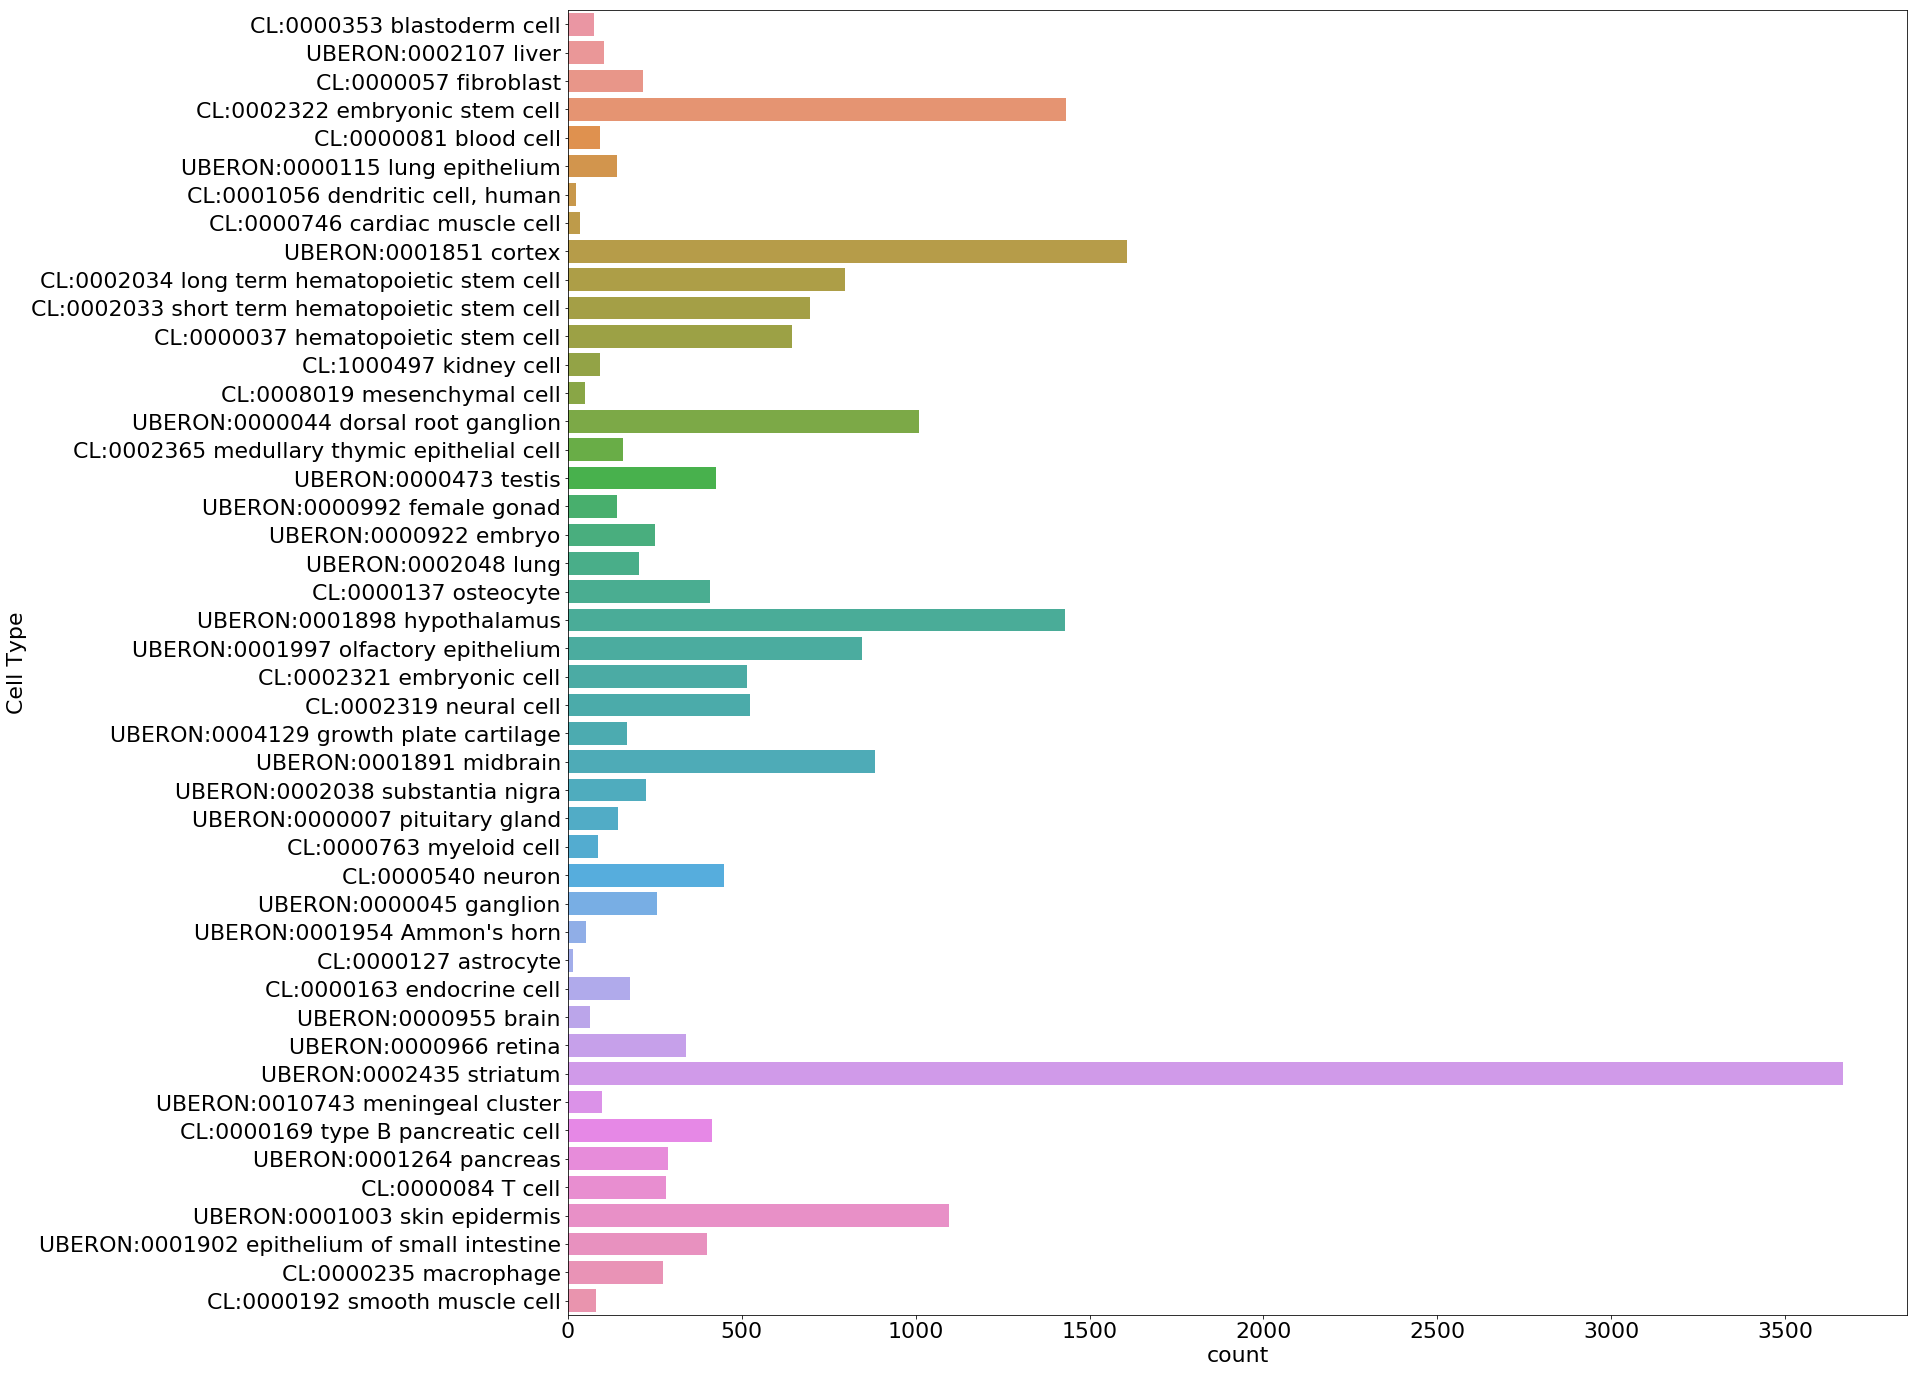

In [29]:
plt.figure(figsize=(24,24))
_ = sns.countplot(y=TRAIN_LAB_DF['Cell Type'])

In [31]:
cells_counts = TRAIN_LAB_DF.groupby('Cell Type')['Cell Type'].count()
print(cells_counts.describe())
print("The most frequent category: ", cells_counts.argmax())

count      46.000000
mean      464.978261
std       627.089378
min        16.000000
25%        99.250000
50%       253.500000
75%       520.750000
max      3667.000000
Name: Cell Type, dtype: float64
('The most frequent category: ', 'UBERON:0002435 striatum')


In [32]:
cells_counts

Cell Type
CL:0000037 hematopoietic stem cell                645
CL:0000057 fibroblast                             216
CL:0000081 blood cell                              93
CL:0000084 T cell                                 283
CL:0000127 astrocyte                               16
CL:0000137 osteocyte                              409
CL:0000163 endocrine cell                         180
CL:0000169 type B pancreatic cell                 415
CL:0000192 smooth muscle cell                      80
CL:0000235 macrophage                             273
CL:0000353 blastoderm cell                         76
CL:0000540 neuron                                 449
CL:0000746 cardiac muscle cell                     36
CL:0000763 myeloid cell                            86
CL:0001056 dendritic cell, human                   24
CL:0002033 short term hematopoietic stem cell     696
CL:0002034 long term hematopoietic stem cell      798
CL:0002319 neural cell                            523
CL:0002321 embryon

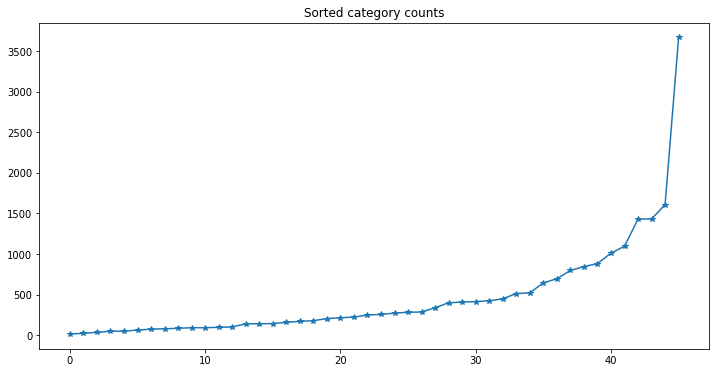

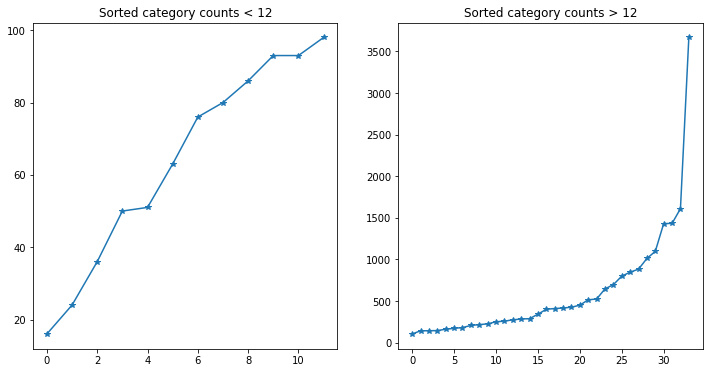

In [14]:
sorted_cells_counts = sorted(cells_counts.values)
index_100 = np.where(np.array(sorted_cells_counts) > 100)[0][0]

plt.figure(figsize=(12, 6))
plt.title("Sorted category counts")
_ = plt.plot(sorted_cells_counts, '*-')

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Sorted category counts < %i" % index_100)
_ = plt.plot(sorted_cells_counts[:index_100], '*-')

plt.subplot(122)
plt.title("Sorted category counts > %i" % index_100)
_ = plt.plot(sorted_cells_counts[index_100:], '*-')

In [15]:
TEST_DF = pd.read_csv(os.path.join(INPUT_PATH, 'test_covariates.tsv'), sep='\t')

In [16]:
TEST_DF[TEST_DF.index == 1]

,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,...,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
1,0.955589,0.0,0.0,0.0,0.0,2.587993,0.0,0.0,0.937082,3.393596,...,0.005525,0.09887,1.128097,0.0,0.0,0.449774,2.101531,0.006728,1.239057,1.144656


In [17]:
TEST_DF[TEST_DF.index == 1].values

array([[ 0.95558928,  0.        ,  0.        , ...,  0.00672829,
         1.23905701,  1.1446565 ]])

In [21]:
strings = TRAIN_LAB_DF['Cell Type'].unique()

In [24]:
l2n['UBERON:0002435 striatum']

37

In [23]:
l2n = {s:i for i,s in enumerate(strings)}
n2l = {i:s for i,s in enumerate(strings)}

In [26]:
np.save('../data/map.npy',{'n2l':n2l, 'l2n':l2n})

In [143]:
TRAIN_LAB_DF['num'] = pd.Series([l2n[x] for x in TRAIN_LAB_DF['Cell Type']], index=TRAIN_LAB_DF.index)

In [149]:
TRAIN_LAB_DF.to_csv(path_or_buf='../data/train_observed_labels_new.tsv',sep='\t',index=False)

In [153]:
TRAIN_LAB_DF = pd.read_csv(os.path.join(INPUT_PATH, 'train_observed_labels_new.tsv'), sep='\t')

In [501]:
TRAIN_LAB_DF.

,num
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [175]:
for i in range(len(TEST_DF.index)-1):
    print TEST_DF.iloc[i]
    break

100009600     0.000000
100009609     0.000000
100009614     0.000000
100012        0.000000
100017        0.016823
100019        0.501120
100033459     0.000000
100034251     0.000000
100034361    14.689076
100034363     0.000000
100034684     0.000000
100034729     0.000000
100036518     0.000000
100036521     0.012108
100037258     0.009131
100037278     0.032582
100037282     0.629332
100037283     0.000000
100038347     0.000000
100038417     0.000000
100038489     0.000000
100038538     0.000000
100038570     0.000000
100038657     0.000000
100038725     0.928427
100038847     0.000000
100038854     0.000000
100038859     0.000000
100038860     0.000000
100038862     0.000000
               ...    
99371         1.679738
99375         0.008966
99377         0.000000
99382         0.000000
99412         0.283918
99439         0.000000
99470         0.185688
99480         0.000000
99512         0.000000
99526         0.000000
99543         0.000000
99571         0.000000
99586      

In [176]:
TRAIN_LAB_DF

,num
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [273]:
import random

In [495]:
# sanity check, unique mapping
train_ids = []
val_ids = []
perc = 0
for i in TRAIN_ID_DF['Experiment ID'].unique():
    for j in TRAIN_LAB_DF[TRAIN_ID_DF['Experiment ID']==i]['num'].unique():
        trails = TRAIN_ID_DF[TRAIN_LAB_DF['num']==j]['Experiment ID'].unique()
        if len(trails) == 1:
            train_ids += list(trails)
train_ids = list(set(train_ids))

# train val split
for i in TRAIN_LAB_DF['num'].unique():
    trail = TRAIN_ID_DF[TRAIN_LAB_DF['num']==i]['Experiment ID'].unique()
    trail = np.setdiff1d(np.setdiff1d(trail, train_ids),val_ids)
    # random.shuffle(trail)
    ind = int(len(trail) * perc)
    train_ids += list(trail[:ind])
    val_ids += list(trail[ind:])

In [28]:
n2l[33]

'CL:0000127 astrocyte'

In [35]:
TRAIN_LAB_DF

,Cell Type
0,CL:0000353 blastoderm cell
1,CL:0000353 blastoderm cell
2,CL:0000353 blastoderm cell
3,CL:0000353 blastoderm cell
4,CL:0000353 blastoderm cell
5,CL:0000353 blastoderm cell
6,UBERON:0002107 liver
7,UBERON:0002107 liver
8,UBERON:0002107 liver
9,UBERON:0002107 liver
